# 필수과제 5
- 통계 분석 과제
- 종속변수가 범주형임
- 해당 변수에 대한 시각화 -> 정규성 -> t-test를 진행하는데
- 컬럼에 대한 이해도를 바탕으로 분석 목적을 정확하게 잡고-> 그걸 기반으로 본인의 가설을 검정하는 코드와 주석처리를 진행해주세요!
- 지금까지 배웠던 모든 분석 방법을 해야 합니다.
- 분석 결과를 바탕으로 시각화를 통해서 실제 데이터의 값도 비교해 주세요!

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_test.csv')

In [53]:
df.columns

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

- alcohol: 알코올 도수
- malic_acid: 말산 함량
- ash: 잔류 설탕 함량
- alcalinity_of_ash: 잔류 염기 함량
- magnesium: 마그네슘 함량
- total_phenols: 총 페놀 함량
- flavanoids: 플라보노이드 함량
- nonflavanoid_phenols: 비 플라보노이드 페놀 함량
- proanthocyanins: 프로안토시아닌 함량
- color_intensity: 색의 강도
- hue: 색상
- od280/od315_of_diluted_wines: 희석 와인의 OD280/OD315 비율
- proline: 프롤린 함량
- class: 와인의 등급 (0, 1, 2로 표현됨)

In [54]:
# 불필요한 인덱스 열 삭제
df = df.drop(columns=['Unnamed: 0'])

In [55]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


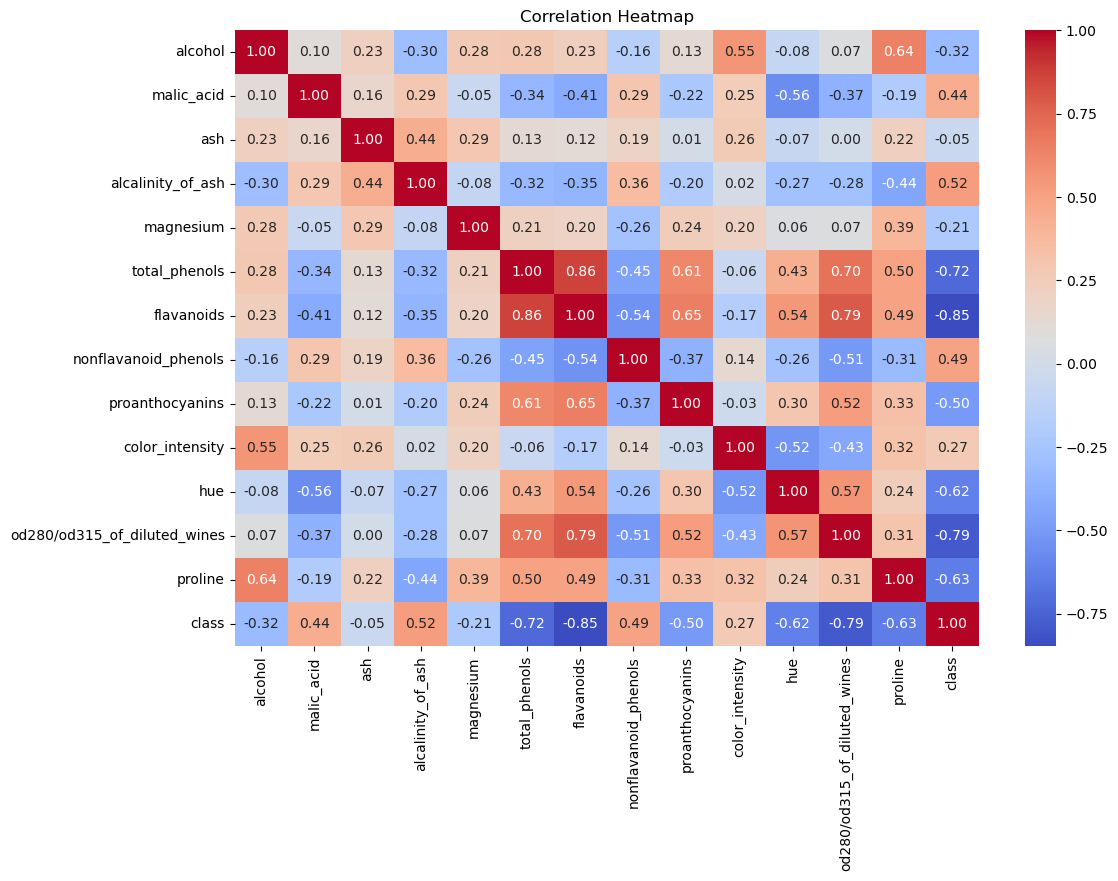

In [56]:
# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## case 2 독립 표본 t검정 시도
- 귀무가설(H0): 와인의 등급(class)과 알코올 도수(Alcohol) 사이에 유의미한 차이가 없다.

- 대립가설(H1): 와인의 등급(class)과 알코올 도수(Alcohol) 사이에 유의미한 차이가 있다.


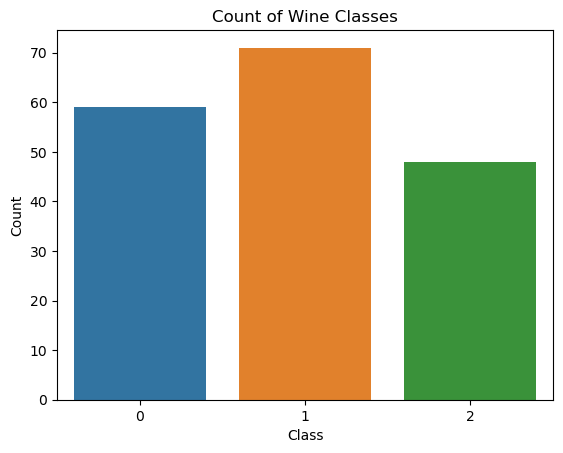

In [57]:
# 종속변수 'class'에 대한 시각화
sns.countplot(x='class', data=df)
plt.title('Count of Wine Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



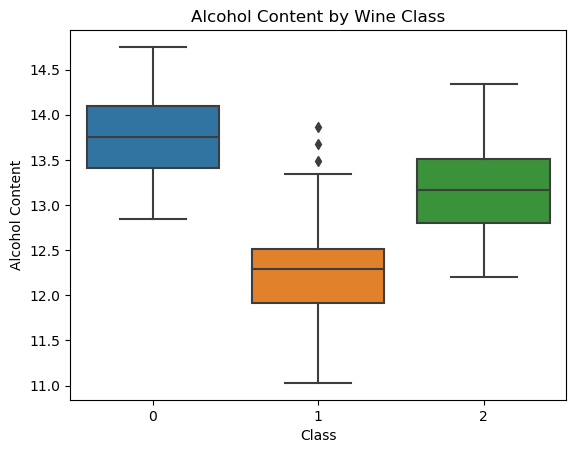

In [58]:
# 'class'에 따른 'alcohol' 데이터 시각화
sns.boxplot(x='class', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Class')
plt.xlabel('Class')
plt.ylabel('Alcohol Content')
plt.show()


In [59]:
# 'class' 0인 와인들의 'alcohol' 데이터 추출 alc 결측치 제거해서 변수에 저장
alcohol_class_0 = df[df['class'] == 0]['alcohol'].dropna()

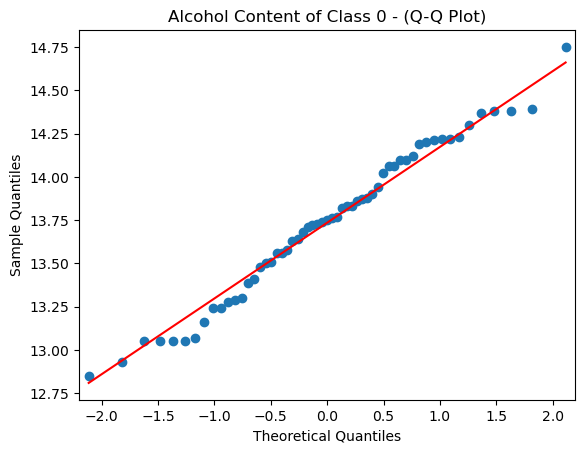

In [60]:
# 정규성 확인을 위한 시각화 (Q-Q Plot)
import statsmodels.api as sm
sm.qqplot(alcohol_class_0, line='s')
plt.title('Alcohol Content of Class 0 - (Q-Q Plot)')
plt.show()

In [61]:
# t-test 수행
population_mean = df['alcohol'].mean()
t_stat, p_val = ttest_ind(alcohol_class_0, [population_mean] * len(alcohol_class_0))

C:\Users\kgw08\AppData\Local\Temp\ipykernel_10656\3796757134.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(alcohol_class_0, [population_mean] * len(alcohol_class_0))


In [62]:
shapiro(alcohol_class_0) 
#결과 해석: pvalue > 0.05 이므로 정규성 검정 완료 (ttest 일표본 진행가능)

ShapiroResult(statistic=0.9781621694564819, pvalue=0.3895796835422516)

In [63]:
from scipy.stats import ttest_1samp

ttest_1samp(alcohol_class_0, population_mean)

Ttest_1sampResult(statistic=12.76501826163607, pvalue=3.2163392221931266e-18)

In [64]:
if((3.2163392221931266e-18 > alpha)== True):
    print('true. 귀무가설을 기각하지 않습니다')
else: print('false. 귀무가설을 기각합니다')

false. 귀무가설을 기각합니다


In [65]:
alcohol_class_0.mean()

13.735263157894737

- class가 0인 와인의 알코올 도수 = 모집단
- 표본 개수 57개

##### 정규성 검정
- class가 0인 와인의 알코올 도수를 추출한 alcohol_class_0에 대해 shapiro-Wilk 검정을 실시한 결과, 정규분포를 따르므로 윌콕슨 대신 t-test를 이용해 데이터 검정을 진행함

##### t-test 일표본 검정
- class가 0인 와인의 알코올 도수를 전체 와인 데이터의 알코올 도수 평균과 비교하기 위해 t-test를 진행
- 검정결과 pvlaue가 유의수준 0.05보다 작음
- 귀무가설을 기각함
- 클래스 0인 와인의 알코올 도수는 전체 와인의 알코올 도수 평균과 차이가 있다.
- class = 0인 평균 값은 13.735로, 전체 와인 알코올 두수 평균보다 더 높은 값을 지니고 있다.

### 독립 표본 t-검정
- 귀무가설(H0): 'class'가 2인 와인과 'class'가 1인 와인의 색상은 차이가 없다.
- 대립가설(H1): 'class'가 2인 와인과 'class'가 1인 와인의 색상은 차이가 있다.

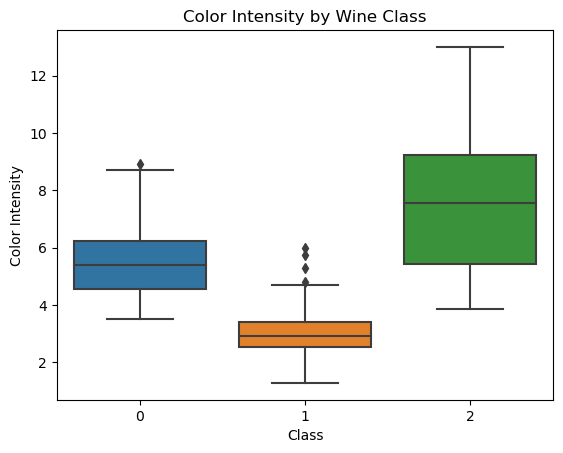

In [66]:
# 'class'에 따른 'color_intensity' 데이터 시각화
sns.boxplot(x='class', y='color_intensity', data=df)
plt.title('Color Intensity by Wine Class')
plt.xlabel('Class')
plt.ylabel('Color Intensity')
plt.show()

In [67]:
# 'class'가 2인 와인과 1인 와인의 'color_intensity' 데이터 추출
color_intensity_class_1 = df[df['class'] == 1]['color_intensity'].dropna()
color_intensity_class_2 = df[df['class'] == 2]['color_intensity'].dropna()

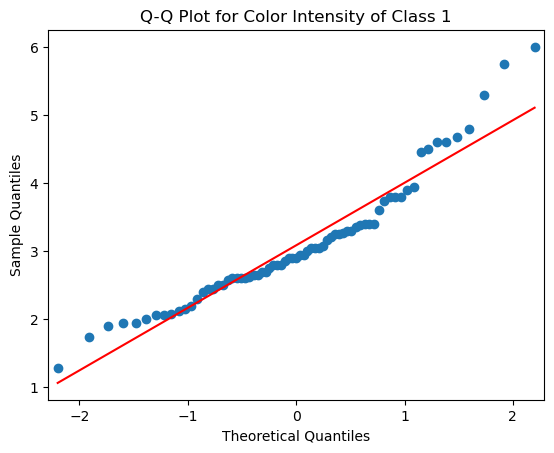

In [68]:
# 정규성 확인을 위한 시각화 (Q-Q Plot) - class 1
sm.qqplot(color_intensity_class_1, line='s')
plt.title('Q-Q Plot for Color Intensity of Class 1')
plt.show()

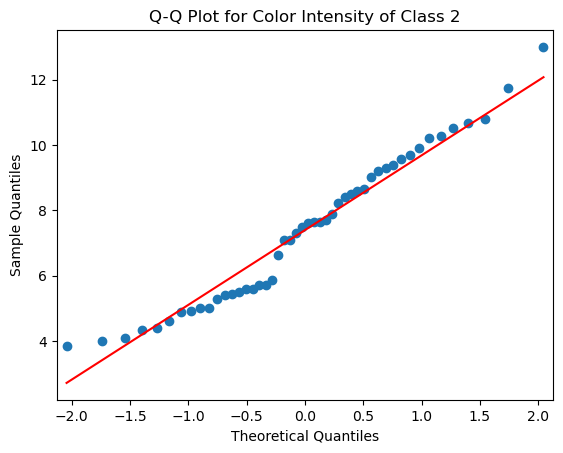

In [69]:
# 정규성 확인을 위한 시각화 (Q-Q Plot) - class 2
import statsmodels.api as sm
sm.qqplot(color_intensity_class_2, line='s')
plt.title('Q-Q Plot for Color Intensity of Class 2')
plt.show()

In [70]:
print(shapiro(color_intensity_class_1))  
print(shapiro(color_intensity_class_2))

ShapiroResult(statistic=0.9317483305931091, pvalue=0.0008194572874344885)
ShapiroResult(statistic=0.9584943056106567, pvalue=0.08775369822978973)


- color_intensity_class_1 경우, pvalue > 0.05 정규성 검정 통과 
- color_intensity_class_2 경우, pvalue < 0.05 으로 정규성 검정 미통과

- 두 모집간은 정규모집단이 아니기 때문에, ttest_ind를 사용할 수 없다
- 윌콕슨 순위합 검정으로 진행한다 (비모수 검정)

In [71]:
# 두 그룹의 샘플 수를 출력하여 확인
print("Class 2 샘플 수:", len(color_intensity_class_2))
print("Class 1 샘플 수:", len(color_intensity_class_1))

Class 2 샘플 수: 48
Class 1 샘플 수: 71


In [72]:
# 샘플 수를 맞추기 위해 일부 샘플 삭제
if len(color_intensity_class_2) > len(color_intensity_class_1):
    color_intensity_class_2 = color_intensity_class_2.sample(len(color_intensity_class_1))
else:
    color_intensity_class_1 = color_intensity_class_1.sample(len(color_intensity_class_2))

In [73]:
# 두 그룹의 샘플 수를 다시 출력하여 확인
print("Class 2 샘플 수 (조정 후):", len(color_intensity_class_2))
print("Class 1 샘플 수 (조정 후):", len(color_intensity_class_1))

Class 2 샘플 수 (조정 후): 48
Class 1 샘플 수 (조정 후): 48


In [74]:
# 윌콕슨 순위합 검정 수행
from scipy.stats import wilcoxon
stat, p_val = wilcoxon(color_intensity_class_2, color_intensity_class_1)


In [75]:
#정규성 불만족 시 윌콕슨 순위합 (맨휘트니 검정) 실행
from scipy.stats import mannwhitneyu
alpha = 0.05
mannwhitneyu(color_intensity_class_2,color_intensity_class_1)

MannwhitneyuResult(statistic=2252.0, pvalue=7.799630203150574e-16)

In [76]:
#검정 결과
if((9.618844244489082e-16 > alpha)== True):
    print('귀무가설을 기각하지 않습니다')
else: print('귀무가설을 기각합니다')

귀무가설을 기각합니다


- 맨휘트니 검정 (비모수 검정) 결과
- pvalue < 0.05 유의수준보다 작기 때문에, 대립가설 채택 / 귀무가설 기각
- 즉, class = 1인 와인 hue과 class = 2인 와인 hue 간 색상은 차이가 있습니다